In [4]:
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['font.sans-serif'] = ['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False

class MyData:
    def __repr__(self):
        return str(self.__dict__).replace(", '", ",\n'")
d = MyData()
print(d)

{}


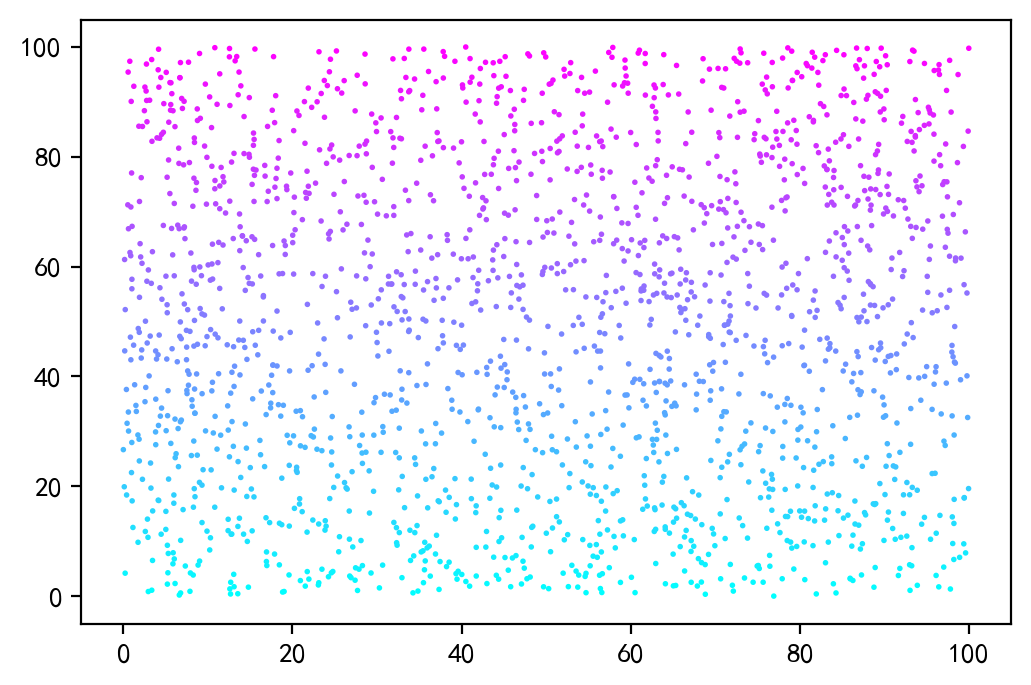

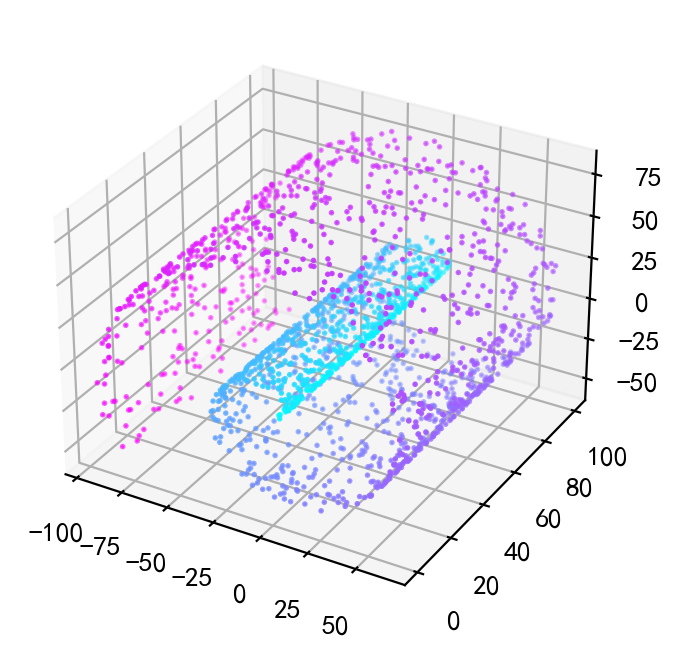

In [5]:
# 阿基米德螺线
import math
sample_n=2000
sample_scale=100
draw_scale=10
np.random.seed(1234)
import random
random.seed(1234)
d.xy_pre=sample_scale*np.random.rand(sample_n,2)
d.target = d.xy_pre[:,1]
#print(d)
ax = plt.axes()
ax.scatter(d.xy_pre[:,0], d.xy_pre[:,1], c=d.target, cmap='cool', s=1)
plt.show()
d.y = d.xy_pre[:,0]
def trans_spiral(angle):
    x = angle * math.cos(angle/draw_scale)
    y = angle * math.sin(angle/draw_scale)
    return x, y
d.xz = np.array([ trans_spiral(ang) for ang in d.xy_pre[:,1] ])
d.target = d.xy_pre[:,1]
d.xyz = np.vstack((d.xz[:, 0], d.y, d.xz[:, 1])).transpose() # 在列上合并矩阵并转置
#print(d)
ax = plt.axes(projection='3d')
ax.scatter(d.xyz[:, 0], d.xyz[:, 1], d.xyz[:, 2], c=d.target, cmap='cool', s=1)
plt.show()

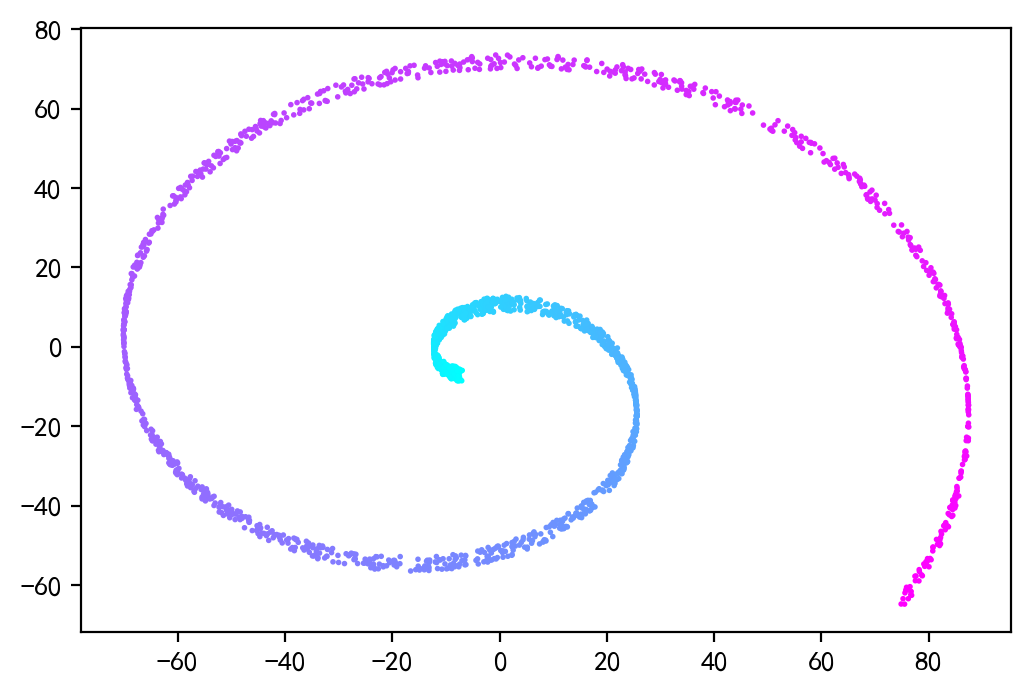

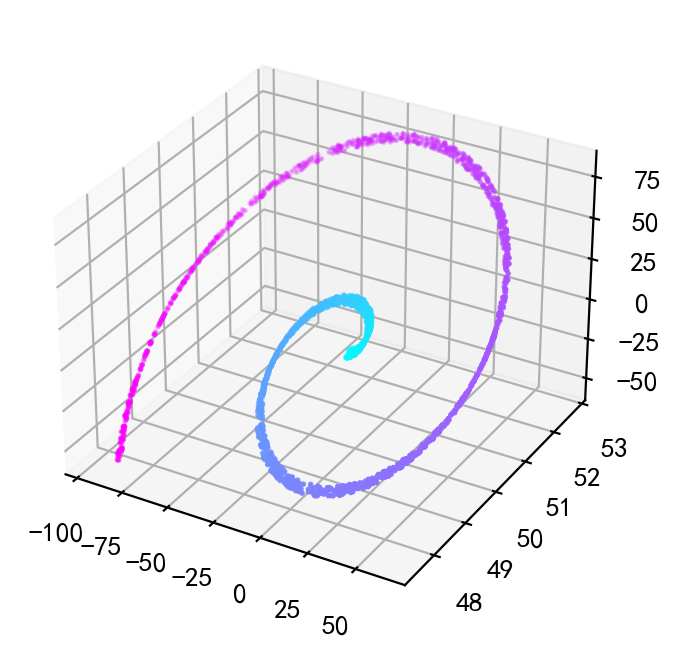

In [6]:
# 使用PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
d.pca_result = pca.fit_transform(d.xyz)
ax = plt.axes()
ax.scatter(d.pca_result[:, 0], d.pca_result[:, 1], c=d.target, cmap='cool', s=1)
plt.show()
# 再进行还原
d.pca_xyz = pca.inverse_transform(d.pca_result)
ax = plt.axes(projection='3d')
ax.scatter(d.pca_xyz[:, 0], d.pca_xyz[:, 1], d.pca_xyz[:, 2], c=d.target, cmap='cool', s=1)
plt.show()

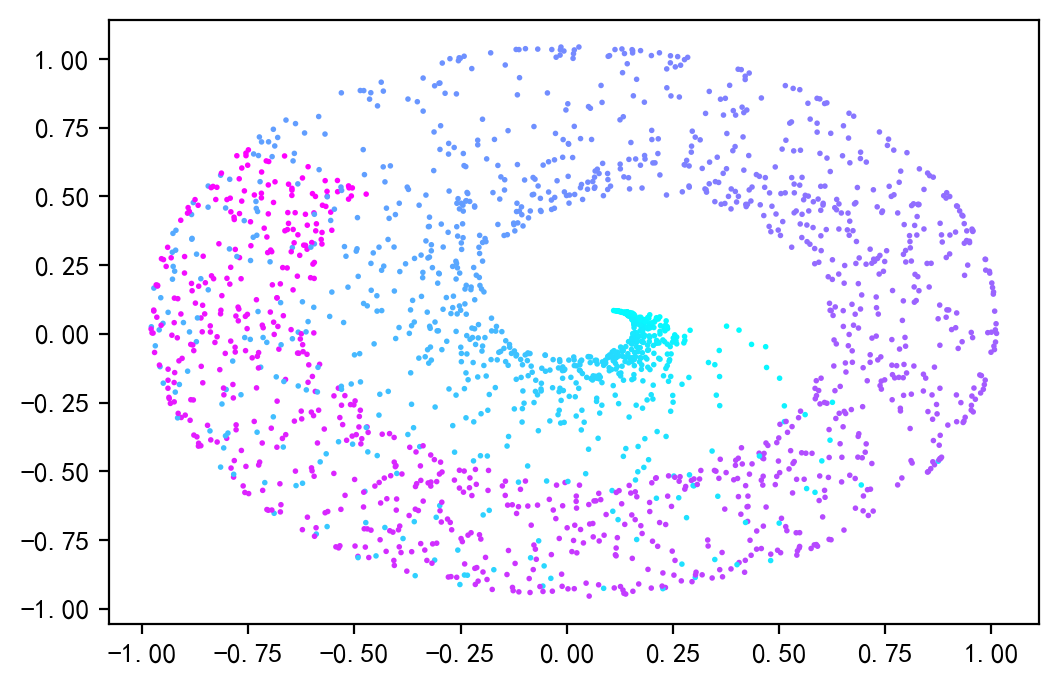

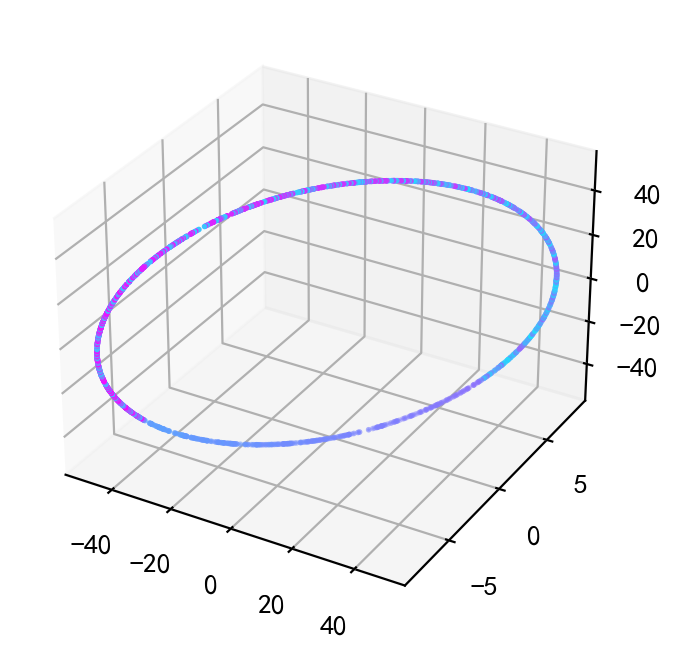

In [7]:
# 使用kernelPCA降维
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='cosine', fit_inverse_transform=True) # {'linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed'}, default='linear'
d.kpca_result = kpca.fit_transform(d.xyz)
ax = plt.axes()
ax.scatter(d.kpca_result[:, 0], d.kpca_result[:, 1], c=d.target, cmap='cool', s=1)
plt.show()
# 再进行还原
d.kpca_xyz = kpca.inverse_transform(d.kpca_result)
ax = plt.axes(projection='3d')
ax.scatter(d.kpca_xyz[:, 0], d.kpca_xyz[:, 1], d.kpca_xyz[:, 2], c=d.target, cmap='cool', s=1)
plt.show()